In [1]:
import numpy as np
import pandas as pd
import sklearn as ktl
import pickle
import matplotlib.pylab as plt
import seaborn

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import Lasso

from sklearn.ensemble import RandomForestRegressor

## Importing satellite and survey data 

In [2]:
sdg_indexes = pd.read_csv("data/sdg_prediction/sdg_indexes.csv")
sat_mod = pd.read_csv("data/sdg_prediction/sat_mod.csv")

## Define Features and labels 

In [3]:
X = sat_mod[['lnEGDPpc2012', 'lnagr_land2012', 'lnurb_land2012', 'ln_perUrb_land2012',
                'ln_tr400_pop2012', 'ln_pm25_2012', 'ln_land_temp2012']]
       

y = sdg_indexes["imds"]

np.random.seed(86)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Set up Lasso model 

In [18]:
model = linear_model.Lasso()
model.fit(X_train, y_train)

print("R2 training set", round(model.score(X_train, y_train)*100, 2))
print("R2 training set", round(model.score(X_test, y_test)*100, 2))

pred_train = model.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
print("MSE training set:", round(mse_train, 2))

pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, pred)
print("MSE test set:", round(mse_test,2))

R2 training set 18.58
R2 training set 17.98
MSE training set: 35.22
MSE test set: 45.31


### Lasso Coefficients 

In [32]:
# Lasso coefficients for all features 
coeff = model.coef_

#Extract the relevant coefficients 
relevant = np.array(X.columns)[coeff>0]
relevant

array(['ln_tr400_pop2012'], dtype=object)

In [ ]:
#dummies = pd.get_dummies(df[['League', 'Division','NewLeague']])

In [ ]:
print('R squared training set', round(reg.score(X_train, y_train)*100, 2))
print('R squared test set', round(reg.score(X_test, y_test)*100, 2))

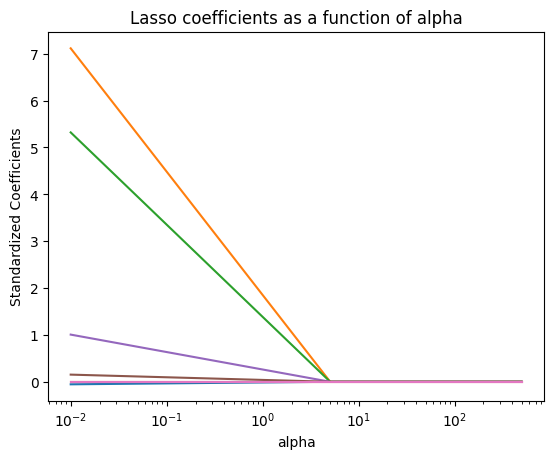

In [19]:
alphas = np.linspace(0.01,500,100)
lasso = linear_model.Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');